# Machine Learning -  Linear Regression in Python
## What is Linear Regression
##  Linear Regression from scratch


Importing needed libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# E = sum[1/2m(yhat - y)**2]

# Using sklearn

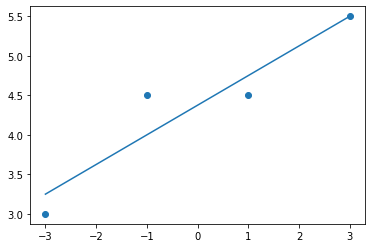

In [28]:
x_data = np.array([-3,-1,1,3]).reshape([-1, 1])
y_data = np.array([3,4.5,4.5,5.5]).reshape([-1, 1])

regr = LinearRegression()
regr.fit(x_data,y_data)
y_pred = regr.predict(x_data)

plt.plot(x_data, y_pred)
plt.scatter(x_data, y_data)
plt.show()

# Optimal values of c and m

In [29]:
c = regr.intercept_
m = regr.coef_

print(c)
print(m)

[4.375]
[[0.375]]


# Linear Regression from scratch

<IPython.core.display.Javascript object>


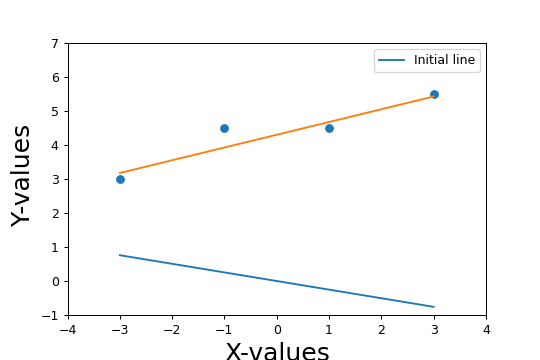

In [42]:
random.seed(9)

## Generates sample data
def generate_data():
    x_data = np.array([-3,-1,1,3]).reshape([-1, 1])
    y_data = np.array([3,4.5,4.5,5.5]).reshape([-1, 1])
    return x_data, y_data
    
## Initializes m and c to starting values
def initialize_params():
    m = random.uniform(-1,1)
    c = 0
    return {"c": c, "m": m}


## Makes a prediction
def predict(x, m, c):
    y = m*x + c
    return y


# Optimizes the model
def optimize_model(X, Y, learn_rate, iterations):
    m = initialize_params()["m"]
    c = initialize_params()["c"]
    
    
    ## Get the initial prediciton and plot it
    y_init = predict(x_data, m, c)
    fig = plt.figure()
    plt.axis([-4, 4, -1, 7])
    plt.scatter(x_data, y_data)
    plt.plot(x_data, y_init, label = "Initial line")
    plt.legend()
    plt.xlabel('X-values', size = 20)
    plt.ylabel(' Y-values', size = 20)
    fig.canvas.draw()
    
    ## Now make the model better
    error_list = []
    for i in range(iterations):
        for x,t in zip(X, Y):
            y = predict(x, m, c)
            error = t - y
            error_list.append(error)
            m = m + learn_rate*error*x
            c = c + learn_rate*error

        pred = predict(x_data, m, c)

        line, = plt.plot(x_data, pred)
        fig.canvas.draw()
        line.remove()
        time.sleep(0.1)
    
    plt.plot(x_data, pred)
    fig.canvas.draw()
    return {"m":m, "c":c}, error_list
    
    
def model(X, Y, learn_rate, iterations):
    initialize_params()
    optimal_params = {}
    optimal_params, error_list = optimize_model(X, Y, learn_rate, iterations)
    return optimal_params, error_list
    
    
learn_rate = 0.01
iterations = 100

x_data, y_data = generate_data()
    
optimal_params, error_list = model(x_data, y_data, learn_rate,iterations ) 

# Optimal values of c and m

In [35]:
c = optimal_params["c"]
m = optimal_params["m"]
print(c)
print(m)

[4.30545611]
[0.37537386]


# Testing it against sklearn

In [37]:
regr = LinearRegression()
regr.fit(x_data,y_data)
y_pred = regr.predict(x_data)

plt.plot(x_data,y_pred, label = "sklearn")
plt.legend()
fig.canvas.draw()

# Error Vs number of iterations

<IPython.core.display.Javascript object>


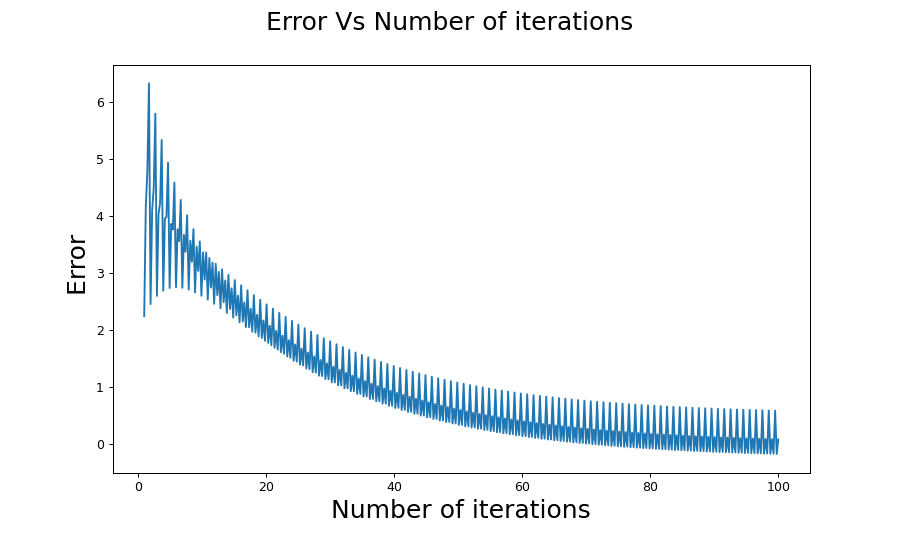

In [39]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of iterations', size = 20)
plt.ylabel(' Error', size = 20)
plt.suptitle('Error Vs Number of iterations', size = 20)
plt.plot(np.linspace(1, 100, 400), error_list)
plt.show()

# Using Real-life data

## Loading our housing dataset 
We will load our data on house sales in King County to predict house prices using simple (one input) linear regression

In [45]:
dataset = pd.read_csv('datasets/kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


__We want to be able to predict `Y` which is our price variable.__ 

In [46]:
Y = dataset[['price']]
Y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [47]:
X = dataset.drop(['price', 'id', 'date'],  axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X.info()

In [ ]:
#show first 5 records
X.head()

__Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding `NaN` values__

In [48]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Checking how House Price changes with House Sqft

<IPython.core.display.Javascript object>


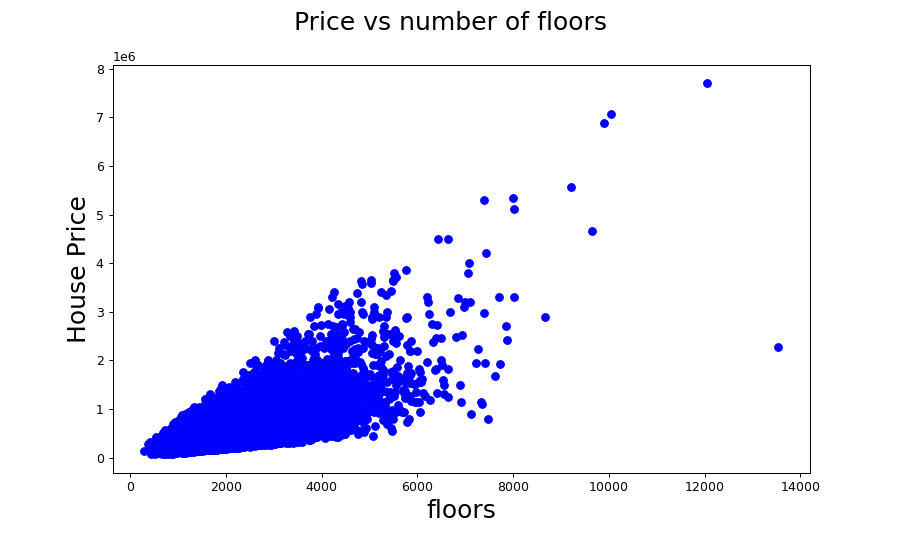

In [49]:
x = X[['sqft_living']]
y = Y

plt.figure(figsize=(10,6))
plt.scatter(x,y, marker='o', color='b')
plt.xlabel('floors', size = 20)
plt.ylabel('House Price', size = 20)
plt.suptitle('Price vs number of floors', size = 20)
plt.show()

__Compute correlation between variables and our predictor variable__

In [50]:
dataset = dataset.drop(['id', 'date'], axis=1)

In [51]:
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


__We can even visualize the table above__

<IPython.core.display.Javascript object>


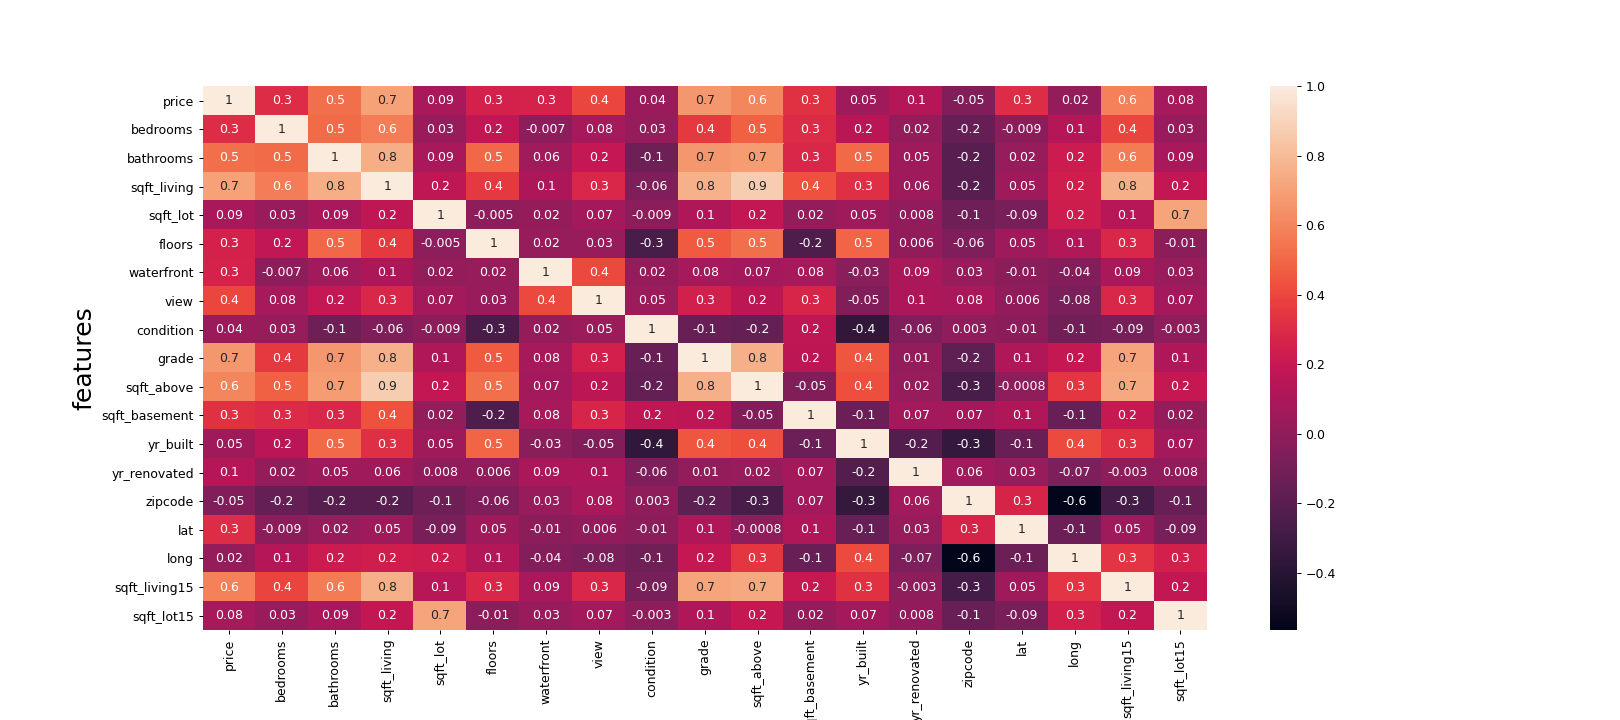

In [52]:

plt.figure(figsize=(18,8))
sns.heatmap(dataset.corr(), xticklabels = dataset.columns, yticklabels = dataset.columns, annot=True, fmt='.1g', cmap=None)
plt.xlabel("features", fontsize = 20)
plt.ylabel("features",  fontsize = 20)
plt.show()

<a id='3'></a>
##  Implement using Scikit-Learn

In [67]:
len(X.columns)

18

In [71]:
dataset = pd.read_csv('datasets/kc_house_data.csv')
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)

model = LinearRegression()
model.fit(X, Y)
prediction  = model.predict(X)


## Print predictions

In [72]:
print(prediction)

[[208877.94625835]
 [734051.82489345]
 [380504.72486554]
 ...
 [143431.94647627]
 [385287.12317213]
 [146084.82660569]]
